# Purpose: build a model to classify game outcome between three options (Home_win/ Away_win/ Draw).
# Assumption: home team with home_win_pct is higher than away team win away_win_pct with away_win_pct will win the game.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools

In [5]:
_path = r'C:\Users\DucTRung\Desktop\data_set\european_football\soccer'

In [6]:
_path_save = r'C:\Users\DucTRung\Desktop\GitHub\Data_project\European_Footboll\home_win_pct_figure'

In [7]:
match_df = pd.read_csv(_path + '\Match.csv', sep='\t')
team_df = pd.read_csv(_path + '\Team.csv', sep='\t', encoding='latin-1')

In [8]:
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


## Subset Columns

In [9]:
# Match data frame
data = match_df[['season',
         'home_team_api_id',
         'away_team_api_id',
         'home_team_goal',
         'away_team_goal']]

# Team data frame
team_name = team_df[['team_api_id', 'team_long_name']]

## Merge

In [10]:
# merge home_team_name
x = pd.merge(data, team_name, left_on='home_team_api_id', right_on='team_api_id', how='left')
x = x.drop('team_api_id', axis=1)
x = x.rename(columns={'team_long_name': 'home_team_name'})# merge home_team_name

In [11]:
# merge away_team_name
data = pd.merge(x, team_name, left_on='away_team_api_id', right_on='team_api_id', how='left')
data = data.drop('team_api_id', axis=1)
data = data.rename(columns={'team_long_name': 'away_team_name'})

In [12]:
def team_win(data):
    if data['home_team_goal'] > data['away_team_goal']:
        return data['home_team_name']
    elif data['home_team_goal'] < data['away_team_goal']:
        return data['away_team_name']
    else:
        return 'Draw'
def team_lose(data):
    if data['home_team_goal'] < data['away_team_goal']:
        return data['home_team_name']
    elif data['home_team_goal'] > data['away_team_goal']:
        return data['away_team_name']
    else:
        return 'Draw'
def game_outcome(data):
    if data['home_team_goal'] > data['away_team_goal']:
        return 'Home_win'
    elif data['home_team_goal'] < data['away_team_goal']:
        return 'Away_win'
    else:
        return 'Draw'
def home_win(data):
    if data['home_team_goal'] > data['away_team_goal']:
        return data['home_team_name']
    else:
        return '/'
def away_win(data):
    if data['home_team_goal'] < data['away_team_goal']:
        return data['away_team_name']
    else:
        return '/'

In [13]:
data['winning_team'] = data.apply(lambda x: team_win(x), axis=1)
data['losing_team'] = data.apply(lambda x: team_lose(x), axis=1)
data['game_outcome'] = data.apply(lambda x: game_outcome(x), axis=1)
data['home_team_win'] = data.apply(lambda x: home_win(x), axis=1)
data['away_team_win'] = data.apply(lambda x: away_win(x), axis=1)

In [14]:
data.head()

,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_name,away_team_name,winning_team,losing_team,game_outcome,home_team_win,away_team_win
0,2008/2009,9987,9993,1,1,KRC Genk,Beerschot AC,Draw,Draw,Draw,/,/
1,2008/2009,10000,9994,0,0,SV Zulte-Waregem,Sporting Lokeren,Draw,Draw,Draw,/,/
2,2008/2009,9984,8635,0,3,KSV Cercle Brugge,RSC Anderlecht,RSC Anderlecht,KSV Cercle Brugge,Away_win,/,RSC Anderlecht
3,2008/2009,9991,9998,5,0,KAA Gent,RAEC Mons,KAA Gent,RAEC Mons,Home_win,KAA Gent,/
4,2008/2009,7947,9985,1,3,FCV Dender EH,Standard de Liège,Standard de Liège,FCV Dender EH,Away_win,/,Standard de Liège


Text(0, 0.5, '')

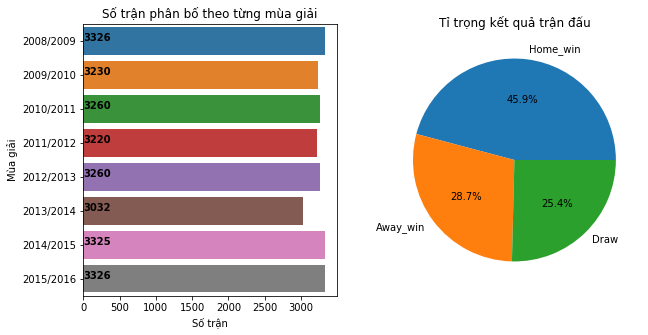

In [15]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
match_season = data['season'].value_counts().sort_index(ascending=True)
match_season = match_season.reset_index()
match_season = match_season.sort_values(by=['index'])
ax = sns.barplot(x=match_season['season'], y=match_season['index'])
for i, j in enumerate(match_season['season']):
    ax.text(.7, i, j, weight='bold')

plt.title('Số trận phân bố theo từng mùa giải')    
plt.ylabel('Mùa giải')
plt.xlabel('Số trận')

plt.subplot(1, 2, 2)
data.game_outcome.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Tỉ trọng kết quả trận đấu')
plt.ylabel('')

# plt.savefig(_path_save + '\\analysis_data_set.png', bbox='tight')

           Home_win  Away_win  Draw
2008/2009      1566       929   831
2009/2010      1532       884   814
2010/2011      1520       901   839
2011/2012      1498       904   818
2012/2013      1444       963   853
2013/2014      1404       892   736
2014/2015      1494       981   850
2015/2016      1459      1012   855


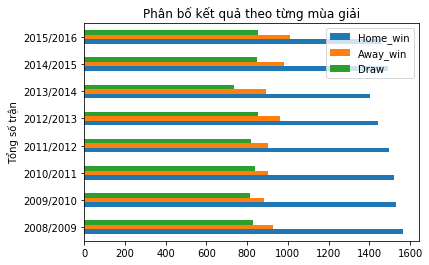

In [16]:
z = {}
for i in list(match_season['index']):
    x = data[data['season'] == i]['game_outcome'].value_counts()
    z[i] = x
out_come_season = pd.DataFrame.from_dict(data=z, orient='index')
print(out_come_season)

out_come_season.plot(kind='barh')
plt.title('Phân bố kết quả theo từng mùa giải')
plt.ylabel('Tổng số trận')

plt.savefig(_path_save + '\\analysis_data_set_2.png', bbox='tight')

             0
2008/2009  188
2009/2010  185
2010/2011  186
2011/2012  186
2012/2013  186
2013/2014  174
2014/2015  188
2015/2016  188


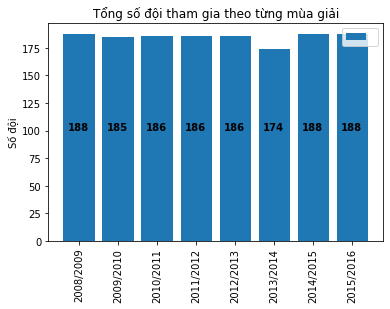

In [17]:
z = {}
for i in match_season['index']:
    x = len(data[data['season'] == i]['home_team_api_id'].unique())
#     y = len(data[data['season'] == i]['away_team_api_id'].unique())
    z[i] = x

team_season = pd.DataFrame.from_dict(data=z, orient='index')
print(team_season)

x = list(team_season.index)
height = team_season[0]

plt.bar(x= x, height=height)
for i, j in enumerate(height):
    plt.text(i-.3, 100, j, weight='bold')
plt.xticks(rotation=90)
plt.legend([''])
plt.title('Tổng số đội tham gia theo từng mùa giải')
plt.ylabel('Số đội')
plt.savefig(_path_save + '\\team_season.png', bbox='tight')

## Split Train and Test Set

In [18]:
# Split train and test set
train_set = data[data['season'] != '2015/2016']
test_set = data[data['season'] == '2015/2016']

In [19]:
# checking train_set by its season
train_set['season'].unique()
test_set['season'].unique()

array(['2015/2016'], dtype=object)

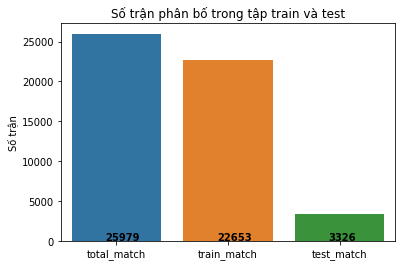

In [20]:
train_match = match_season[:7]
test_match = match_season.iloc[-1]
labels = ['total_match', 'train_match', 'test_match']
y =[train_match['season'].sum() + test_match['season'], train_match['season'].sum(), test_match['season']]
ax = sns.barplot(x=labels, y=y)
for i, j in enumerate(y):
    ax.text(i-0.1, 100, j, weight='bold')
plt.title('Số trận phân bố trong tập train và test')    
plt.ylabel('Số trận')
plt.xlabel('')
plt.savefig(_path_save + '\\dis_train_test.png', bbox_inches='tight')

## Analysis Train Set

Text(0, 0.5, '')

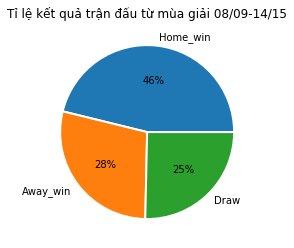

In [21]:
train_set['game_outcome'].value_counts().plot.pie(autopct='%1.0f%%',
                                                  wedgeprops={'linewidth':2, 'edgecolor': 'white'})
plt.title('Tỉ lệ kết quả trận đấu từ mùa giải 08/09-14/15')
plt.ylabel('')
# plt.savefig(_path_save + '\\train_out_come_pct.png', bbox_inches='tight')

## Calculate 'Home_win_pct' / 'Draw_win_pct' Each Team

In [22]:
print('number of home team:',len(train_set.home_team_api_id.unique()))
print('number of away team:',len(train_set.away_team_api_id.unique()))

number of home team: 286
number of away team: 286


In [23]:
total_win = train_set.winning_team.value_counts()[1:].reset_index()
home_win = train_set.home_team_win.value_counts()[1:].reset_index()
away_win = train_set.away_team_win.value_counts()[1:].reset_index()
home_match = train_set.home_team_name.value_counts().reset_index()
away_match = train_set.away_team_name.value_counts().reset_index()

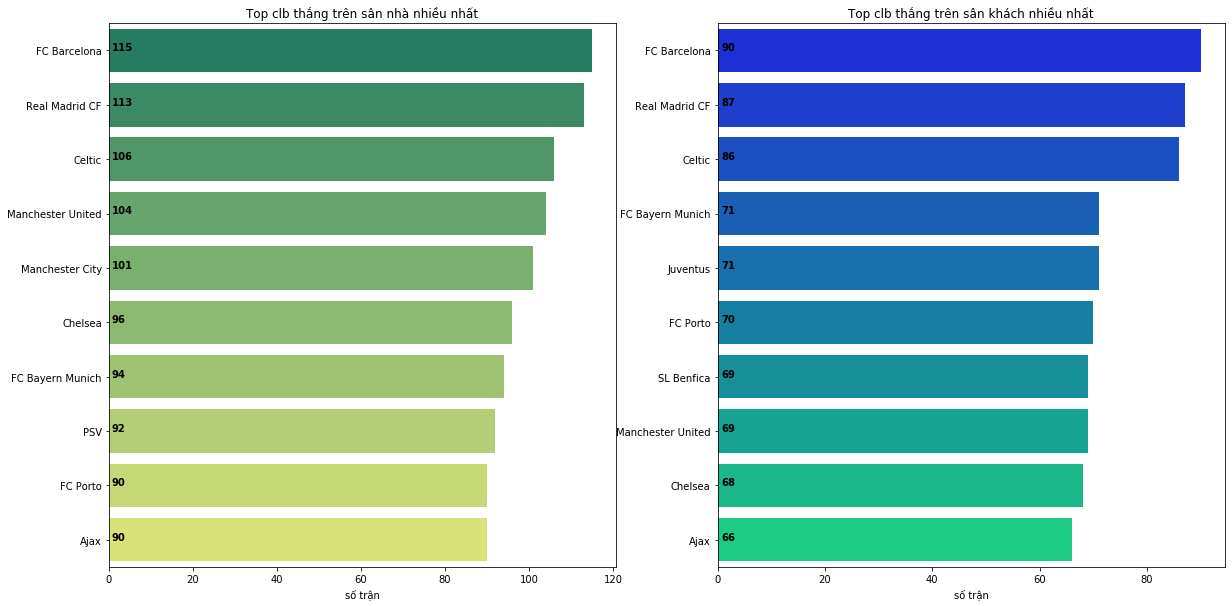

In [24]:
plt.figure(figsize= (20, 10))
plt.subplot(1, 2, 1)
ax = sns.barplot(x= home_win[:10]['home_team_win'], y= home_win[:10]['index'], palette='summer')
for i, j in enumerate(home_win[:10]['home_team_win']):
    ax.text(.7,i, j, weight='bold')
plt.title('Top clb thắng trên sân nhà nhiều nhất')
plt.ylabel('')
plt.xlabel('số trận')

plt.subplot(1, 2, 2)
ax = sns.barplot(x= away_win[:10]['away_team_win'], y= away_win[:10]['index'], palette='winter')
for i, j in enumerate(away_win[:10]['away_team_win']):
    ax.text(.7,i, j, weight='bold')
plt.title('Top clb thắng trên sân khách nhiều nhất')
plt.ylabel('')
plt.xlabel('số trận')

plt.savefig(_path_save + '\\top_team_win.png', bbox_inches='tight')

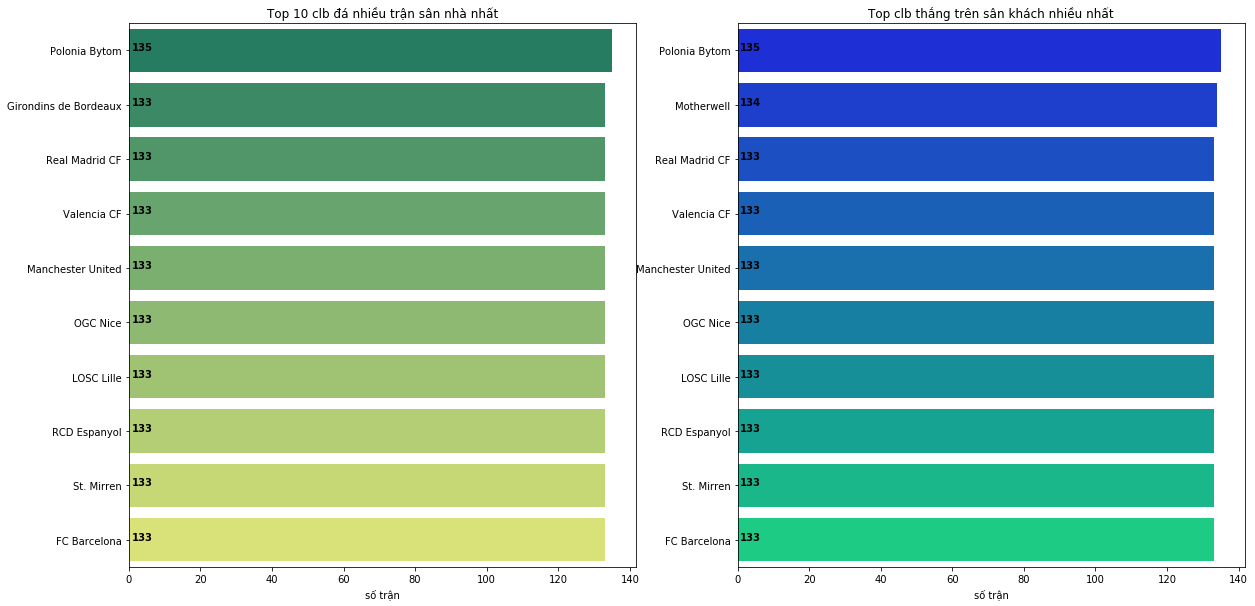

In [25]:
plt.figure(figsize= (20, 10))

plt.subplot(1, 2, 1)
ax = sns.barplot(x= home_match[:10]['home_team_name'], y= home_match[:10]['index'], palette='summer')
for i, j in enumerate(home_match[:10]['home_team_name']):
    ax.text(.7,i, j, weight='bold')
plt.title('Top 10 clb đá nhiều trận sân nhà nhất')
plt.ylabel('')
plt.xlabel('số trận')

plt.subplot(1, 2, 2)
ax = sns.barplot(x= away_match[:10]['away_team_name'], y= away_match[:10]['index'], palette='winter')
for i, j in enumerate(away_match[:10]['away_team_name']):
    ax.text(.7,i, j, weight='bold')
plt.title('Top clb thắng trên sân khách nhiều nhất')
plt.ylabel('')
plt.xlabel('số trận')

plt.savefig(_path_save + '\\top_team_match.png', bbox_inches='tight')

In [26]:
# merge home/away_win
_team_att = pd.merge(team_name, home_win, left_on='team_long_name', right_on='index', how='left')
_team_att = pd.merge(_team_att, away_win, left_on='team_long_name', right_on='index', how='left')
_team_att = pd.merge(_team_att, total_win, left_on='team_long_name', right_on='index', how='left')
_team_att = pd.merge(_team_att, home_match, left_on='team_long_name', right_on='index', how='left')
_team_att = pd.merge(_team_att, away_match, left_on='team_long_name', right_on='index', how='left')

team_att = _team_att.drop(['index_x', 'index_y', 'index_x', 'index_y', 'index'], axis=1)
team_att = team_att.rename(columns={'home_team_win': 'home_win',
                                    'away_team_win': 'away_win',
                                    'home_team_name': 'home_match',
                                    'away_team_name': 'away_match',
                                    'winning_team': 'win_match'})

        home_win   away_win
mean   37.066667  22.744755
std    26.741442  18.929636
max   115.000000  90.000000
min     1.000000   1.000000


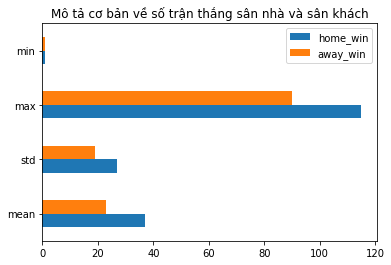

In [27]:
functions = ['mean', 'std', 'max', 'min']
des = team_att[['home_win', 'away_win']].agg(functions)
print(des)
des.plot.barh()
plt.title('Mô tả cơ bản về số trận thắng sân nhà và sân khách')

plt.savefig(_path_save + '\\team_att.png', bbox_inches='tight')

In [28]:
def home_win_pct(data):
    home_win_pct = (data['home_win'] / data['home_match']) * 100
    return home_win_pct

def away_win_pct(data):
    away_win_pct = (data['away_win'] / data['away_match']) * 100
    return away_win_pct

In [29]:
team_att['home_win_pct'] = team_att.apply(lambda x: home_win_pct(x), axis=1)
team_att['away_win_pct'] = team_att.apply(lambda x: away_win_pct(x), axis=1)

In [30]:
team_att = team_att.fillna(0)
team_att.isnull().sum()

team_api_id       0
team_long_name    0
home_win          0
away_win          0
win_match         0
home_match        0
away_match        0
home_win_pct      0
away_win_pct      0
dtype: int64

      home_win_pct  away_win_pct
mean     39.350144     23.509126
std      16.750678     13.209542
max      86.466165     68.421053
min       0.000000      0.000000


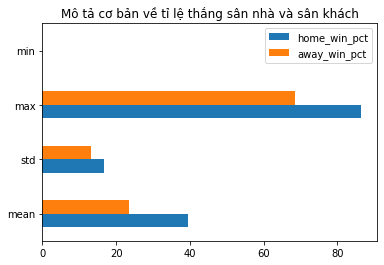

In [31]:
functions = ['mean', 'std', 'max', 'min']
des = team_att[['home_win_pct', 'away_win_pct']].agg(functions)
print(des)
des.plot.barh()
plt.title('Mô tả cơ bản về tỉ lệ thắng sân nhà và sân khách')

plt.savefig(_path_save + '\\team_att_2.png', bbox_inches='tight')

## Merge 'home_win_pct' / 'away_win_pct' to test_set

In [32]:
home_win_pct = team_att[['team_api_id', 'home_win_pct']]
away_win_pct = team_att[['team_api_id', 'away_win_pct']]

print('home_win_pct:\n', home_win_pct)
print('away_win_pct:\n', away_win_pct)

home_win_pct:
      team_api_id  home_win_pct
0           9987     54.945055
1           9993     39.473684
2          10000     41.758242
3           9994     41.758242
4           9984     41.758242
..           ...           ...
294        10190     40.000000
295        10191     42.696629
296         9777     31.428571
297         7730     30.188679
298         7896      0.000000

[299 rows x 2 columns]
away_win_pct:
      team_api_id  away_win_pct
0           9987     36.263736
1           9993     13.157895
2          10000     30.769231
3           9994     30.769231
4           9984     21.978022
..           ...           ...
294        10190     28.888889
295        10191     25.842697
296         9777     25.714286
297         7730     13.207547
298         7896      0.000000

[299 rows x 2 columns]


In [33]:
# Merge home/away_win_pct to test_set by each team
test_set = pd.merge(test_set, home_win_pct, left_on='home_team_api_id', right_on='team_api_id', how='left')
test_set = pd.merge(test_set, away_win_pct, left_on='away_team_api_id', right_on='team_api_id', how='left')

In [34]:
test_set = test_set.drop(['team_api_id_x', 'team_api_id_y'], axis=1)

## Predict

In [35]:
def predict(data):
    if data['home_win_pct'] > data['away_win_pct']:
        return 'Home_win'
    elif data['home_win_pct'] < data['away_win_pct']:
        return 'Away_win'
    else:
        return 'Draw'

In [36]:
test_set['predict'] = test_set.apply(lambda x: predict(x), axis=1)

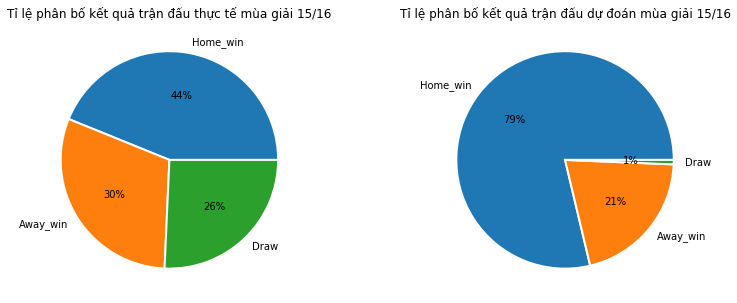

In [37]:
plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
test_set['game_outcome'].value_counts().plot.pie(autopct='%1.0f%%',
                                                  wedgeprops={'linewidth':2, 'edgecolor': 'white'})
plt.title('Tỉ lệ phân bố kết quả trận đấu thực tế mùa giải 15/16')
plt.ylabel('')

plt.subplot(1, 2, 2)
test_set['predict'].value_counts().plot.pie(autopct='%1.0f%%',
                                                  wedgeprops={'linewidth':2, 'edgecolor': 'white'})
plt.title('Tỉ lệ phân bố kết quả trận đấu dự đoán mùa giải 15/16')
plt.ylabel('')

plt.savefig(_path_save + '\\predict.png', bbox_inches='tight')

## Evalution

In [38]:
def measure(data):
    if data['game_outcome'] == data['predict']:
        return 'Right'
    elif data['game_outcome'] != data['predict']:
        return 'Wrong'
    else:
        pritn('vcL')

In [39]:
test_set['measure'] = test_set.apply(lambda x: measure(x), axis=1)

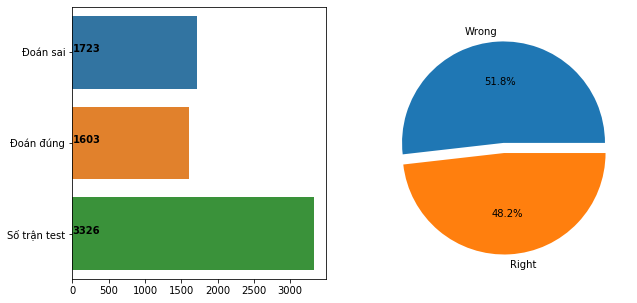

In [40]:
mesure = test_set['measure'].value_counts().reset_index()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
x = ['Đoán sai', 'Đoán đúng', 'Số trận test']
height = [mesure['measure'].iloc[0], mesure['measure'].iloc[1], mesure['measure'].iloc[0] + mesure['measure'].iloc[1]]

ax = sns.barplot(y= x, x= height)
for i, j in enumerate(height):
    ax.text(.7, i, j, weight='bold')

plt.subplot(1, 2, 2)
labels = list(mesure['index'])
sizes = list(mesure['measure'])
explode = (0, 0.1)

plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%')

plt.savefig(_path_save + '\\measure_general.png', bbox_inches='tight')

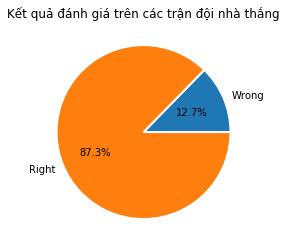

In [41]:
test_set[test_set['game_outcome'] == 'Home_win']['measure'].value_counts().sort_index(ascending= False).plot.pie(autopct='%1.1f%%',
                                                                                   wedgeprops={'linewidth':2, 'edgecolor': 'white'})

plt.title('Kết quả đánh giá trên các trận đội nhà thắng')
plt.ylabel('')
plt.savefig(_path_save + '\\measure_home.png', bbox_inches='tight')

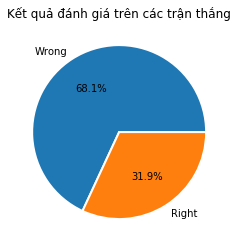

In [42]:
test_set[test_set['game_outcome'] == 'Away_win']['measure'].value_counts().plot.pie(autopct='%1.1f%%',
                                                                    wedgeprops={'linewidth':2, 'edgecolor': 'white'})

plt.title('Kết quả đánh giá trên các trận thắng')
plt.ylabel('')
plt.savefig(_path_save + '\\measure_3.png', bbox_inches='tight')

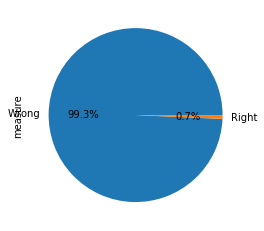

In [43]:
test_set[test_set['game_outcome'] == 'Draw']['measure'].value_counts().plot.pie(autopct='%1.1f%%')